In [45]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

<h4>Question1 : Use yFinance to extract tesla data</h4>

In [10]:
stock = yf.Ticker("TSLA")
tesla_data = stock.history(period="max")

In [8]:
tesla_data.reset_index(inplace=True)

In [11]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h4>Question2:Use Webscraping to Extract Tesla Revenue Data</h4>

In [46]:
response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm")
soup = BeautifulSoup(response.text,"html.parser")
tables = soup.find_all("tbody")
table=tables[0]
rows = table.find_all("tr")
data=[]
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            data.append([date, float(revenue)])
tesla_revenue_data = pd.DataFrame(data, columns=["Date", "Revenue (in millions USD)"])
tesla_revenue_data.tail()

,Date,Revenue (in millions USD)
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


<h4>Question3:Extracting GameStop Stock Data Using yfinance</h4>

In [47]:
stock = yf.Ticker("GME")
gme_data = stock.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h4>Question4:Extracting GameStop Stock Data Using Webscrapping</h4>

In [48]:
response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html")
soup = BeautifulSoup(response.text,"html.parser")
tables = soup.find_all("tbody")
table=tables[0]
rows = table.find_all("tr")
data=[]
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            data.append([date, float(revenue)])
gme_revenue_data = pd.DataFrame(data, columns=["Date", "Revenue (in millions USD)"])
gme_revenue_data.tail()

,Date,Revenue (in millions USD)
11,2009,8806.0
12,2008,7094.0
13,2007,5319.0
14,2006,3092.0
15,2005,1843.0


<h4>Tesla Stock and Revenue Dashboard</h4>

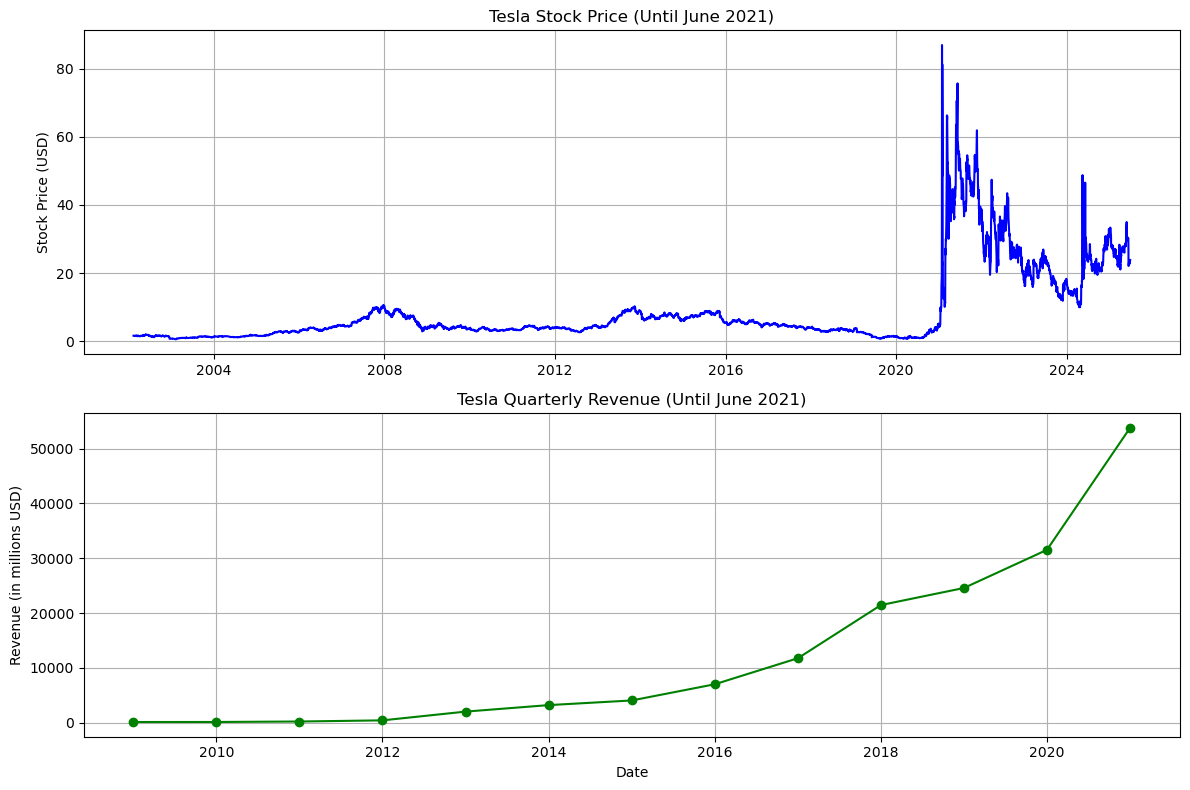

In [59]:
def make_graph(stock_data, revenue_data, company):
    stock_data = stock_data.reset_index()
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])
    revenue_data["Revenue (in millions USD)"] = pd.to_numeric(revenue_data["Revenue (in millions USD)"], errors='coerce')
    revenue_data = revenue_data.dropna()
    revenue_data = revenue_data[revenue_data["Date"] <= "2021-06-30"]
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=False)
    ax[0].plot(stock_data["Date"], stock_data["Close"], color='blue')
    ax[0].set_title(f"{company} Stock Price (Until June 2021)")
    ax[0].set_ylabel("Stock Price (USD)")
    ax[0].grid(True)
    ax[1].plot(revenue_data["Date"], revenue_data["Revenue (in millions USD)"], color='green', marker='o')
    ax[1].set_title(f"{company} Quarterly Revenue (Until June 2021)")
    ax[1].set_xlabel("Date")
    ax[1].set_ylabel("Revenue (in millions USD)")
    ax[1].grid(True)
    plt.tight_layout()
    plt.show()
make_graph(tesla_data, tesla_revenue_data, 'Tesla')


<h4>Game Stop Stock and Revenue Dashboard</h4>

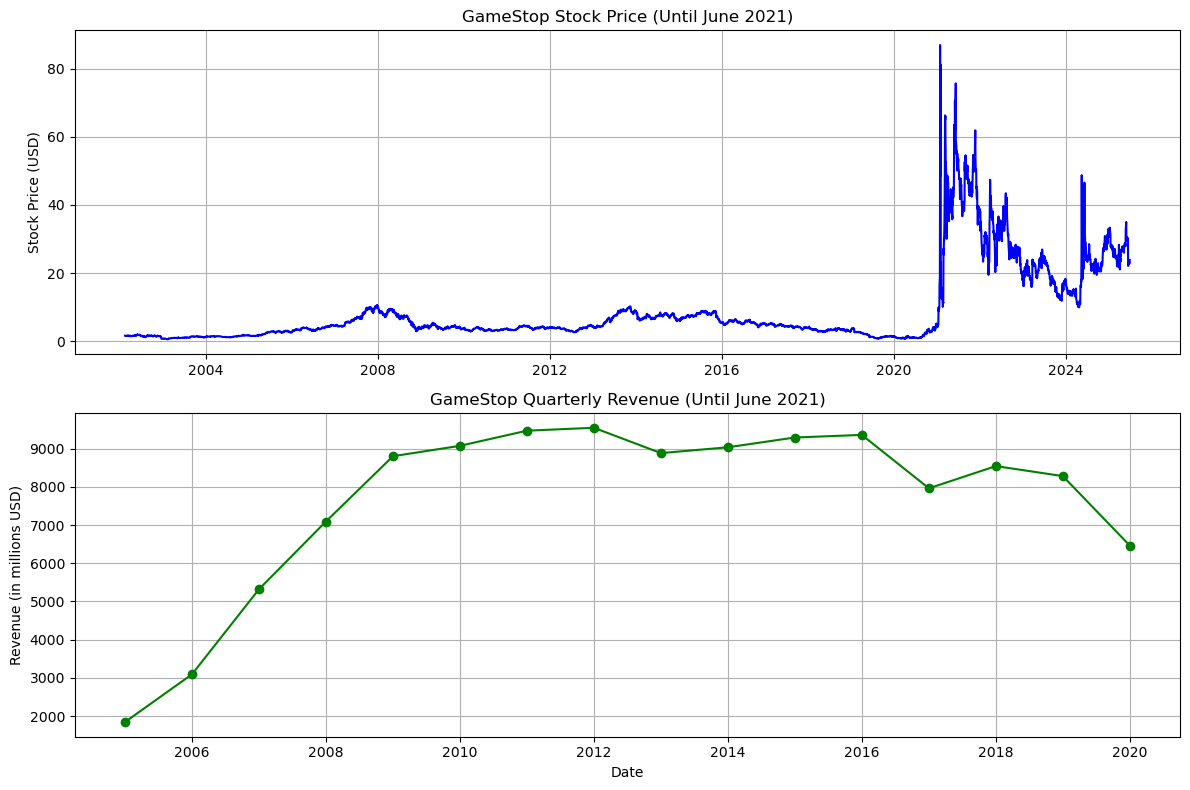

In [60]:
def make_graph(stock_data, revenue_data, company):
    stock_data = stock_data.reset_index()
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])
    revenue_data["Revenue (in millions USD)"] = pd.to_numeric(revenue_data["Revenue (in millions USD)"], errors='coerce')
    revenue_data = revenue_data.dropna()
    revenue_data = revenue_data[revenue_data["Date"] <= "2021-06-30"]
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=False)
    ax[0].plot(stock_data["Date"], stock_data["Close"], color='blue')
    ax[0].set_title(f"{company} Stock Price (Until June 2021)")
    ax[0].set_ylabel("Stock Price (USD)")
    ax[0].grid(True)
    ax[1].plot(revenue_data["Date"], revenue_data["Revenue (in millions USD)"], color='green', marker='o')
    ax[1].set_title(f"{company} Quarterly Revenue (Until June 2021)")
    ax[1].set_xlabel("Date")
    ax[1].set_ylabel("Revenue (in millions USD)")
    ax[1].grid(True)
    plt.tight_layout()
    plt.show()
make_graph(gme_data, gme_revenue_data, 'GameStop')